# 2. Penman-Monteith FAO Valpolicella

### **Descrizione delle componenti**
Il modello GEOET offre la formulazione per la evapotraspirazione di Penman-Monteith [FAO](https://www.fao.org/3/X0490E/x0490e06.htm). L'equazione originale di Penman-Monteith è:
\begin{equation}
\lambda\ ET = \dfrac{\Delta\cdot (R_{n} - G)+\frac{p_{a}\cdot\ c_{p}(e_{s}-e)}{r_{a}}}{\Delta+\gamma\cdot(1+\frac{r_{s}}{r_{a}})}
\end{equation}
dove:
- $\lambda ET$ è l'evapotraspirazione in [$MJ \cdot m^{2} \cdot giorno^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ è la pendenza delle curve di saturazione a pressione di vapore espresse in ($kP_{a}\dot °C^{−1}$); 
- $R_{n}$ è la radiazione netta espressa in [$MJ \cdot m^{2} \cdot day^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ è il flusso di calore del suolo alla superficie espresso  in [$MJ \cdot m^{2} \cdot giorno^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\rho_{a}$ è la densità media di aria a pressione costante; 
- $c_{p}$ è il calore specifico dell'aria;
- $e_{s}$ è la saturazione media alla pressione di vapore espressa in ($kP_{a}$); 
- $e_{a}$ è il valore medio di pressione di vapore effettivo; 
- $\gamma$ è la costante psicometrica espressa in ($kP_{a} \cdot$ °$C^{−1}$); 
- $r_{s}$ è la resistenza superficiale; 
- $r_{a}$ è la resistenza aereodinamica.

--- 
Il metodo di FAO Penman-Monteith può essere derivato dall'equazione originale di Penman-Monteith e dalle equazioni della resistenza aereodinamica e della resistenza superficiale determinate dalla FAO per stimare un valore di evapotraspirazione:

\begin{equation}
ET_{0}^{FAO} =  K_{s} \cdot K_{c} \cdot \dfrac{0.408\cdot \Delta\cdot (R_{n} - G)+\gamma\cdot u_{2}\cdot(e_{s}-e)\cdot\frac{C_{p}}{T+273}}{\Delta+\gamma\cdot(1+C_{d}\cdot u_{2})}
\end{equation}

con:
\begin{equation}
 G =  \begin{cases}
   G_{giorno}\cdot R_{n} \quad giorno\\G_{notte}\cdot R_{n} \quad notte
   \end{cases} 
\end{equation}
dove:
- $ET_{0}$ o $ET$ sono espressi in [$mm \cdot giorno^{−1}$] o [$mm\cdot ora^{−1}$]; 
- $K_{s}$ è il coefficiente di stress idrico [-];
- $K_{c}$ è il coefficiente della coltura presa in considerazione [-]; [Tabella 12](https://www.fao.org/3/X0490E/x0490e0b.htm)
- $R_{n}$ è la radiazione netta espressa in[$MJ \cdot m^{2} \cdot giorno^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ è il flusso di calore del suolo al livelllo della superficie, espresso in [$MJ \cdot m^{2} \cdot day^{−1}$] o [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $T$ è il valore medio giornaliero e orario della temperatura, espresso in (°C) ; 
- $u_{2}$ è la velocità del vento, espressa in ($m\cdot s^{−1}$); 
- $e_{s}$ è il valore medio della saturazione a pressione di vapore, espressa in($kP_{a}$); 
- $e$ è il valore medio di pressione di vapore effettivo; 
- $\Delta$ è la pendenza delle curve di saturazione a pressione di vapore, espressa in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ è la costante psicometrica, espressa in ($kP_{a} \cdot$ °$C^{−1}$); 
- $C_{d}$ è un coefficente pari a 0.34 e $C_{p}$ è il coefficiente pari a 900 nel caso in cui lo step temporale sia giornaliero oppure pari a 37 nel caso in cui lo step temporale sia orario. 

- #### **Radiazione Netta**
La radiazione netta è data in serie temporali nell'unità di misura: ($W/m^{2}$). La conversione da The  ($W/m^{2}$) a ($MJ\cdot m^{2}$) è realizzata in modo automatico.
- #### **Velocità media del vento**
La velocità media del vento è espressa in (m/s).
- #### **Umidità relativa**
L'umidità relativa è data in valori percentuali (% ).
- #### **Temperatura dell'aria**
La temperatura dell'aria è espressa in (°C). La conversione in K è realizza in automatico.
- #### **$G_{giorno}$**
$G_{giorno}$ è il coefficiente del flusso di calore del suolo durante il giorno.
- #### **$G_{notte}$**
$G_{notte}$ è il coefficiente del flusso di calore del suolo durante la notte.
- #### **Data di inizio**
Data di inizio è una stringa contenente il primo giorno della simulazione.

# Descrizione input

In [1]:
# librerie

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import os
import plotly.graph_objects as go
from GEOSPACE_Output import*

In [3]:
oms_project_path = os.path.dirname(os.getcwd())
os.chdir(oms_project_path+'/output/Vite_Valpolicella/1')
#os.listdir()

## 1. Evapotraspirazione Effettiva
tutti gli stress sono "attivati" 

Stress Idrico: true

Stress Temperatura: true

Stress Radiazione: true 

Stress Deficit Pressione di Vapore: true

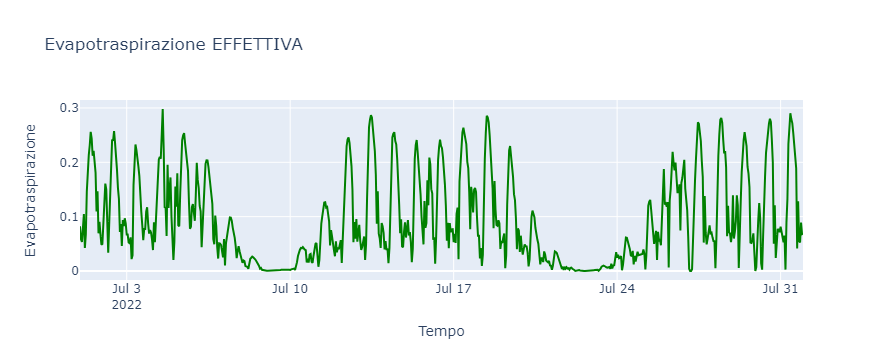

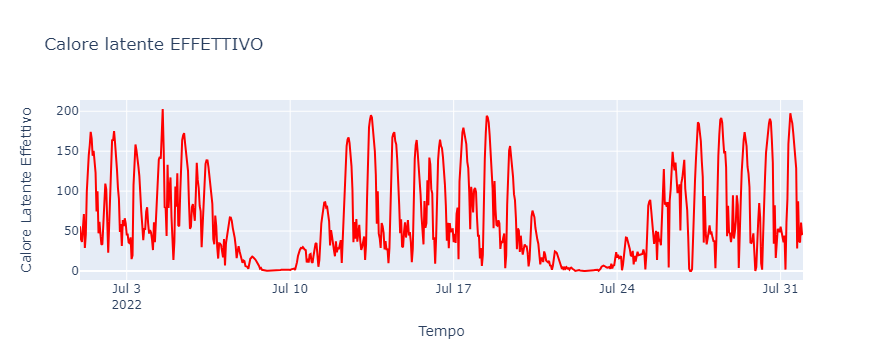

In [4]:
#grafico evapotraspirazione

df3= pd.read_csv('Effettiva3_Evapotraspirazione_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['Tempo','Evapotraspirazione']
fig3 = px.line(df3, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione EFFETTIVA ')
fig3.update_traces(line_color='green')
fig3.show()

#grafico calore latente

df4 = pd.read_csv('Effettiva3_Calore_Latente_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Tempo','Calore Latente Effettivo']
fig4 = px.line(df4, x='Tempo', y='Calore Latente Effettivo', title='Calore latente EFFETTIVO')
fig4.update_traces(line_color='red')
fig4.show()

## 2. Potenziale
tutti gli stress sono "disattivati"

Stress Idrico:false

Stress Temperatura:false

Stress Radiazione: false

Stress Deficit Pressione di Vapore: false

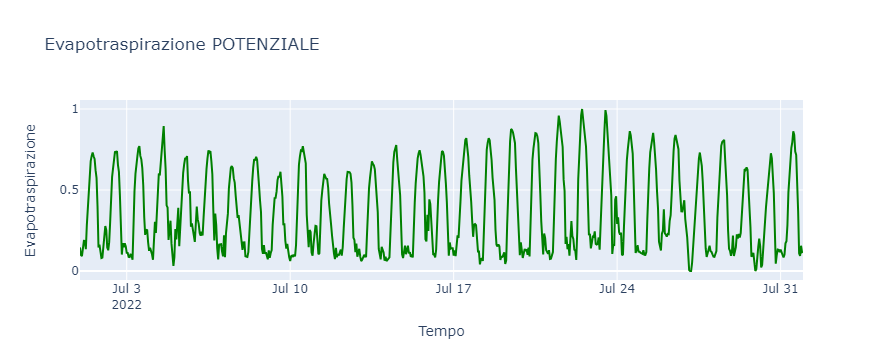

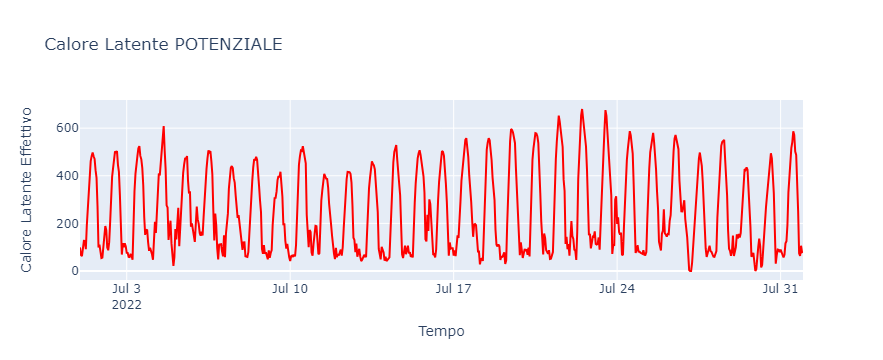

In [5]:
#grafico evapotraspirazione

df1= pd.read_csv('Potenziale3_Evapotraspirazione_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df1, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione POTENZIALE')
fig1.update_traces(line_color='green')
fig1.show()

#grafico calore latente

df2 = pd.read_csv('Potenziale3_Calore_Latente_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['Tempo','Calore Latente Effettivo']
fig2 = px.line(df2, x='Tempo', y='Calore Latente Effettivo', title='Calore Latente POTENZIALE ')
fig2.update_traces(line_color='red')
fig2.show()

# Confronto Evapotraspirazione POTENZIALE-EFFETTIVA

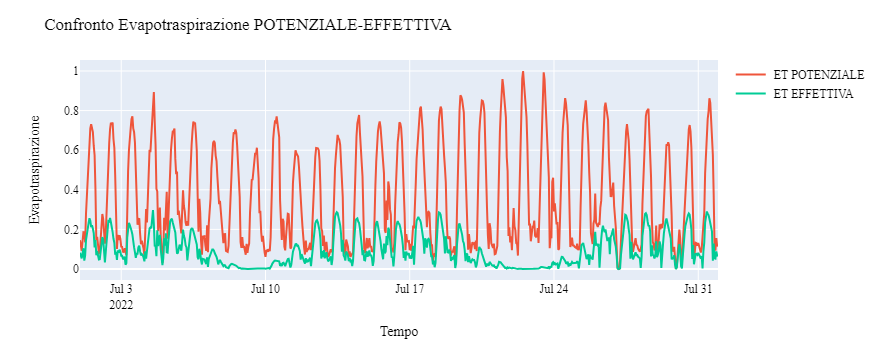

In [6]:
fig = px.line()
fig.add_trace(go.Scatter(x=df1['Tempo'], y=df1['Evapotraspirazione'], mode='lines', name=' ET POTENZIALE'))
fig.add_trace(go.Scatter(x=df3['Tempo'], y=df3['Evapotraspirazione'], mode='lines', name=' ET EFFETTIVA'))

fig.update_layout(
    title='Confronto Evapotraspirazione POTENZIALE-EFFETTIVA',
    xaxis_title="Tempo",
    font_family="Times New Roman",
    font_color="Black",
    title_font_family="Times New Roman",
    title_font_color="Black",
    yaxis_title="Evapotraspirazione",
    #legend_title="Date",
    font=dict(size=12))
fig.show()

## 3. Stress Idrico
Solo lo stress Idrico viene "attivato"

Stress Idrico: True

Stress Temperatura: false

Stress Radiazione: false

Stress Deficit Pressione di Vapore: false

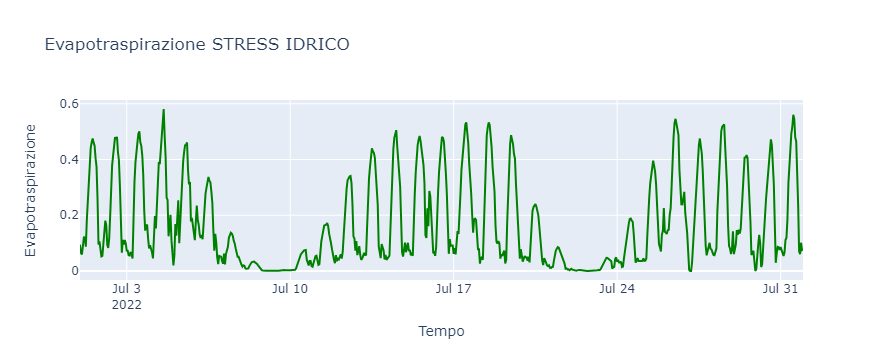

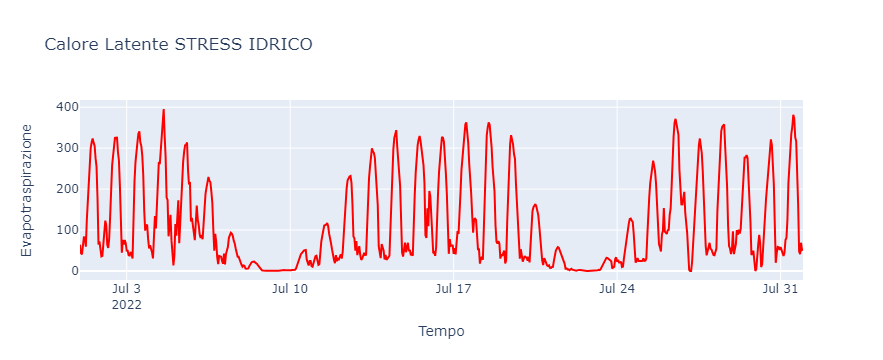

In [7]:
#grafico Evapotraspirazione

df = pd.read_csv('Idrico3_Evapotraspirazione_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig2 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione STRESS IDRICO ')
fig2.update_traces(line_color='green')
fig2.show()

#grafico Calore Latente

df = pd.read_csv('Idrico3_Calore_Latente_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Calore Latente STRESS IDRICO ')
fig1.update_traces(line_color='red')
fig1.show()

## 4. Ambientale
Solo lo stress Idrico viene "disattivato", si ipotizza come condizione ambientale ideale il caso in cui ci sia una disponibnilità idrica senza fine.

Stress Idrico: False

Stress Temperatura: True

Stress Radiazione: True

Stress Deficit Pressione di Vapore:  True

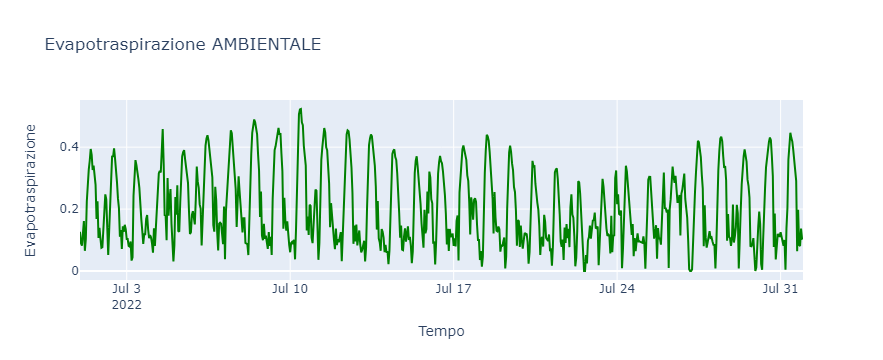

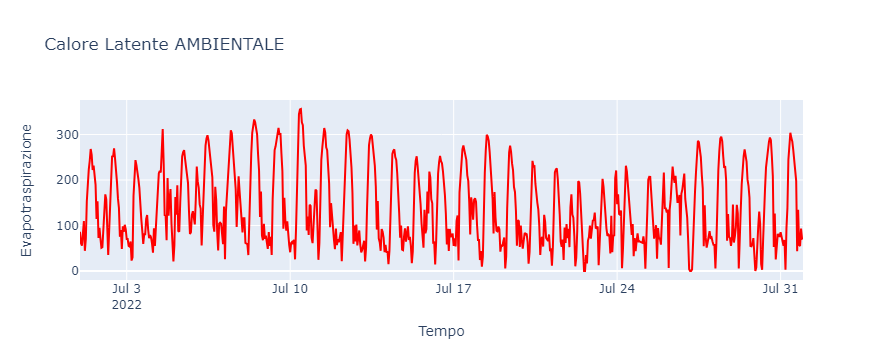

In [8]:
# grafico evapotraspirazione 

df = pd.read_csv('Ambientale3_Evapotraspirazione_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig2 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Evapotraspirazione AMBIENTALE ')
fig2.update_traces(line_color='green')
fig2.show()

#grafico calore latente

df = pd.read_csv('Ambientale3_Calore_Latente_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Tempo','Evapotraspirazione']
fig1 = px.line(df, x='Tempo', y='Evapotraspirazione', title='Calore Latente AMBIENTALE ')
fig1.update_traces(line_color='red')
fig1.show()

## 5.  Grafico di confronto

Nel seguente grafico vengono messi contemporaneamente a confronto 4 differenti variabili:

    -Evapotraspirazione POTENZIALE
    -Evapotraspirazione AMBIENTALE
    -Evapotraspirazione STRESS IDRICO
    -Evapotraspirazione EFFETTIVA

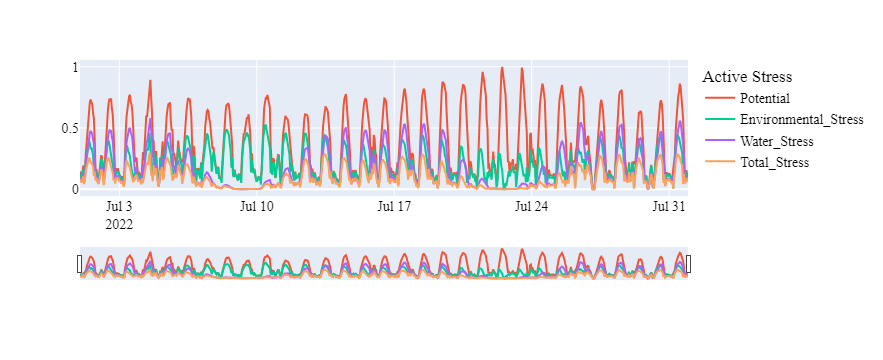

In [9]:
show_stress('Potenziale3_Evapotraspirazione_FAO_1.csv',
            'Ambientale3_Evapotraspirazione_FAO_1.csv',
            'Idrico3_Evapotraspirazione_FAO_1.csv',
            'Effettiva3_Evapotraspirazione_FAO_1.csv')